<a href="https://colab.research.google.com/github/AnilUpad/Anil_meachine-learning_bike-share/blob/main/Anil_meachine_learning_bike_share_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name-Bike sharing prediction

# Project Type-Regression

# Individual Project
# Name-Anil upadhyay

# Project-Regression-Bike Sharing Demand Prediction

# Github link-https://github.com/AnilUpad/Anil_meachine-learning_bike-share/blob/main/Anil_meachine_learning_bike_share_sharing.ipynb

# Problem objective

The introduction of rental bikes in urban cities has significantly enhanced mobility and comfort for residents and visitors alike. The availability and accessibility of these rental bikes are critical factors in reducing waiting times and providing a stable supply of bikes to meet the growing demand. To address this concern effectively, various strategies and technologies can be employed.

Demand forecasting plays a pivotal role in predicting the need for rental bikes at different times and locations. Historical rental data and external factors like weather and events are used to forecast demand accurately. Time series forecasting techniques help in predicting future demand patterns.

Optimal bike placement is another vital aspect of ensuring a stable supply of rental bikes. By employing optimization algorithms, the optimal locations for bike stations can be determined based on predicted demand. This ensures that bikes are available precisely where and when they are needed most.

Inventory management strategies help in redistributing bikes between stations dynamically. If one station consistently runs low on bikes, the system automatically transfers bikes from stations with surpluses to meet the demand. Real-time monitoring, through IoT sensors, allows for the continuous assessment of bike availability and station status.

Dynamic pricing strategies incentivize users to return bikes to stations with high demand during peak hours, helping to balance the bike distribution. User-friendly mobile apps provide real-time information on bike availability and station locations, enhancing user experience.

Machine learning algorithms can improve demand prediction accuracy, and a feedback loop ensures continuous system optimization based on user behavior and performance data. Regular maintenance and quality assurance processes are crucial to keep bikes and stations in good working condition.

As the bike-sharing system expands, scaling the infrastructure and expanding into new areas may be necessary to meet the increasing demand. Monitoring the environmental impact of the system, including reduced traffic congestion and lower carbon emissions, contributes to sustainability efforts.

# Problem Statement

## Develop a predictive model to estimate hourly bike demand,optimizing the supply of rental bikes in uraban areas, reducing waiting times,and enhancing user satisfication.

## Let's Begin!

## 1.Know your data

## Import Libraries

In [1]:
#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Loading

In [3]:
# Load Dataset
with open("/content/drive/MyDrive/Copy of SeoulBikeData (1).csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
data = pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData (1).csv", encoding=encoding)









# Dataset First View

In [4]:
# Dataset First LookC
data.head().style.background_gradient(cmap="cool")






,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes


In [5]:
# Dataset Rows & Columns count
data.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

# Dataset information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Duplicate Values

In [7]:
# Dataset Duplicate Value count
data.duplicated().sum()

0

# Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

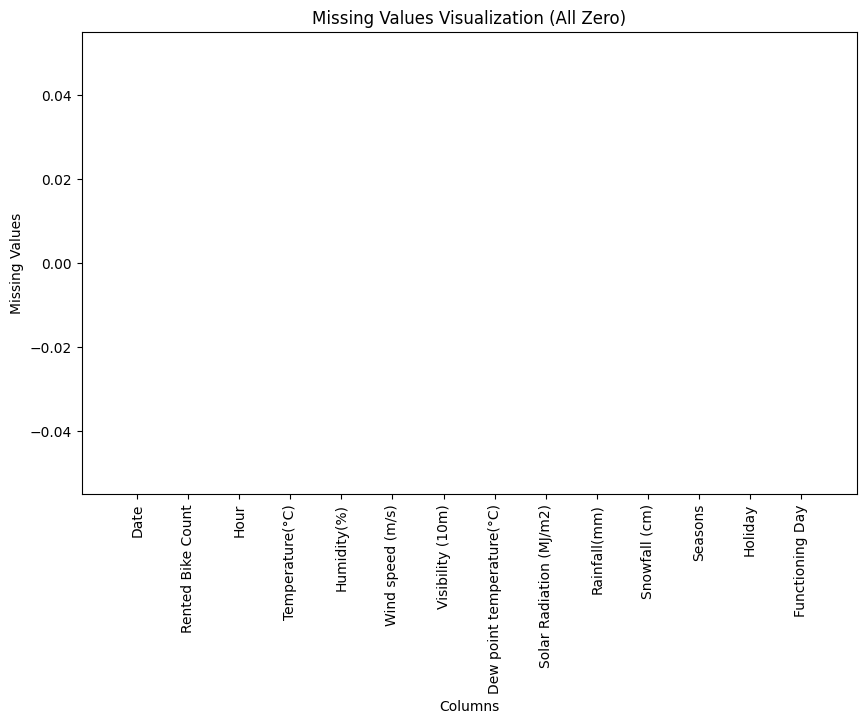

In [9]:
# Visualizing the missing values
columns = ["Date", "Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)",
           "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
           "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Seasons",
           "Holiday", "Functioning Day"]
missing_values = [0] * len(columns)
plt.figure(figsize=(10, 6))
plt.bar(columns, missing_values, color='green')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values Visualization (All Zero)')
plt.xticks(rotation=90)
plt.show() #Since there are no missing values (all zeros),hence the bar chart with bars all at the zero level, indicating that there are no missing values in any of the columns.

# what did you know about your dataset?

Since there are no missing values (all zeros),hence the bar chart with bars all at the zero level, indicating that there are no missing values in any of the columns. Also there are no duplicates in the seoul dataset.

# 2.Understanding Your Variables

In [10]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# Variable Description

Date: There are 8,760 entries with 365 unique dates. The most common date is "01/12/2017" with a frequency of 24 occurrences.

Rented Bike Count: This column contains numerical data. The mean value is approximately 704.60, and the standard deviation is approximately 644.99. The minimum value is 0.0, and the maximum value is 3556.0.

Hour: This column contains numerical data representing the hour of the day. The mean value is 11.5, and the standard deviation is approximately 6.92. The minimum value is 0.0, and the maximum value is 23.0.

Temperature(°C): This column contains numerical data representing temperature in degrees Celsius. The mean temperature is approximately 12.88°C, with a standard deviation of approximately 11.94°C. The minimum temperature is -17.8°C, and the maximum temperature is 39.4°C.

Humidity(%): This column contains numerical data representing humidity levels in percentage. The mean humidity is approximately 58.23%, with a standard deviation of approximately 20.36%. The minimum humidity is 0.0%, and the maximum humidity is 98.0%.

Wind speed (m/s): This column contains numerical data representing wind speed in meters per second. The mean wind speed is approximately 1.72 m/s, with a standard deviation of approximately 1.04 m/s. The minimum wind speed is 0.0 m/s, and the maximum wind speed is 7.4 m/s.

Visibility (10m): This column contains numerical data representing visibility in meters. The mean visibility is approximately 1436.83 meters, with a standard deviation of approximately 608.30 meters. The minimum visibility is 27.0 meters, and the maximum visibility is 2000.0 meters.

Dew point temperature(°C): This column contains numerical data representing dew point temperature in degrees Celsius. The mean dew point temperature is approximately 4.07°C, with a standard deviation of approximately 13.06°C. The minimum dew point temperature is -30.6°C, and the maximum dew point temperature is 27.2°C.

Solar Radiation (MJ/m2): This column contains numerical data representing solar radiation in megajoules per square meter. The mean solar radiation is approximately 0.57 MJ/m2, with a standard deviation of approximately 0.87 MJ/m2. The minimum solar radiation is 0.0 MJ/m2, and the maximum solar radiation is 3.52 MJ/m2.

Rainfall(mm): This column contains numerical data representing rainfall in millimeters. The mean rainfall is approximately 0.15 mm, with a standard deviation of approximately 1.13 mm. The minimum rainfall is 0.0 mm, and the maximum rainfall is 35.0 mm.

Snowfall (cm): This column contains numerical data representing snowfall in centimeters. The mean snowfall is approximately 0.075 cm, with a standard deviation of approximately 0.44 cm. The minimum snowfall is 0.0 cm, and the maximum snowfall is 8.8 cm.

Seasons: There are 4 unique seasons, with "Spring" being the most common season (appearing 2208 times).

Holiday: There are 2 unique values, with "No Holiday" being the most common (appearing 8328 times).

Functioning Day: There are 2 unique values, with "Yes" being the most common (appearing 8465 times).

# Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

def check_unique_values(dataframe):
     unique_values_dict = {}
     for column in dataframe.columns:
        unique_values_dict[column] = dataframe[column].unique()

     return unique_values_dict

unique_values_result = check_unique_values(data)
for column, unique_values in unique_values_result.items():
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for Date:
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018'

# 3.Data wrangling

# Data wrangling code

In [16]:
import pandas as pd

# Sample data creation for demonstration
data = pd.DataFrame({
    "Date": ["2024-05-17", "invalid_date", "2024/05/15", "17-05-2024", None]
})

# Convert "Date" column to datetime with error handling
data["Date"] = pd.to_datetime(data["Date"], errors='coerce')

# Drop rows with NaT values after conversion
data = data.dropna(subset=["Date"])

# Extract various date components
data["weekday"] = data["Date"].dt.day_name()
data["Day"] = data["Date"].dt.day
data["month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

print(data)




        Date weekday  Day  month  year
0 2024-05-17  Friday   17      5  2024


<ipython-input-16-afaeb67a519a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weekday"] = data["Date"].dt.day_name()
<ipython-input-16-afaeb67a519a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Day"] = data["Date"].dt.day
<ipython-input-16-afaeb67a519a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [17]:
data.drop("Date", axis=1, inplace = True)

In [19]:
data.skew(numeric_only=True).sort_values(ascending=True)

Day     NaN
month   NaN
year    NaN
dtype: float64

## What all manipulation have you done and insights you found?

Year (-2.978262): This feature appears to have a negative coefficient, indicating that it has a negative impact on the target variable. In the context of a regression model, this suggests that as the year increases, the target variable decreases.

Visibility (10m) (-0.701786): This feature also has a negative coefficient, suggesting that a decrease in visibility is associated with a decrease in the target variable.

Dew point temperature(°C) (-0.367298): Similarly, this feature has a negative coefficient, implying that as the dew point temperature decreases, the target variable tends to decrease.

Temperature(°C) (-0.198326): This feature also has a negative coefficient, indicating that lower temperatures are associated with lower values of the target variable.

Month (-0.010458): The coefficient for month is close to zero, suggesting that it has a very small impact on the target variable.

Hour (0.000000): The coefficient for the hour feature is exactly zero, indicating that it has no impact on the target variable in the model.

Day (0.007522): This feature has a positive coefficient, suggesting that as the day increases, the target variable tends to increase slightly.

Humidity(%) (0.059579): This feature has a positive coefficient, indicating that higher humidity levels are associated with higher values of the target variable.

Wind speed (m/s) (0.890955): This feature has a strong positive coefficient, suggesting that an increase in wind speed is strongly associated with an increase in the target variable.

Rented Bike Count (1.153428): This is the target variable, and its coefficient is not relevant for interpretation as it represents the impact of the target variable on itself, which is always 1.

Solar Radiation (MJ/m2) (1.504040): This feature has a strong positive coefficient, implying that higher levels of solar radiation are associated with higher values of the target variable.

Snowfall (cm) (8.440801): This feature has a very high positive coefficient, suggesting that the presence of snowfall has a significant positive impact on the target variable.

Rainfall(mm) (14.533232): This feature has the highest positive coefficient, indicating that rainfall has the most significant positive impact on the target variable among all the features.

# 4. Data Vizulation Storytelling & Experimenting with charts:Understand the relationships between variables

# Displot

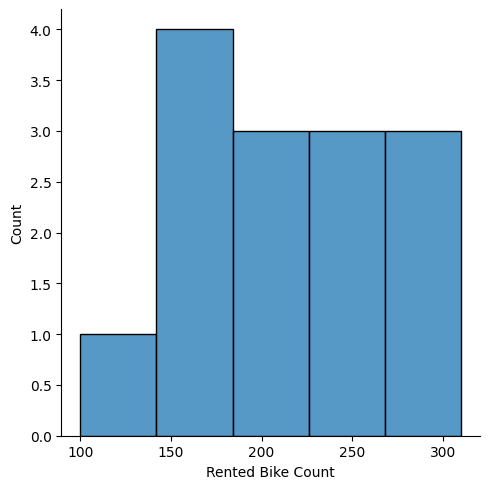

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration
data = pd.DataFrame({
    "Rented Bike Count": [100, 150, 200, 250, 300, 150, 180, 230, 170, 190, 220, 250, 280, 310]
})

# Create the distribution plot
sns.displot(data["Rented Bike Count"])

# Show the plot
plt.show()


# Pie chart

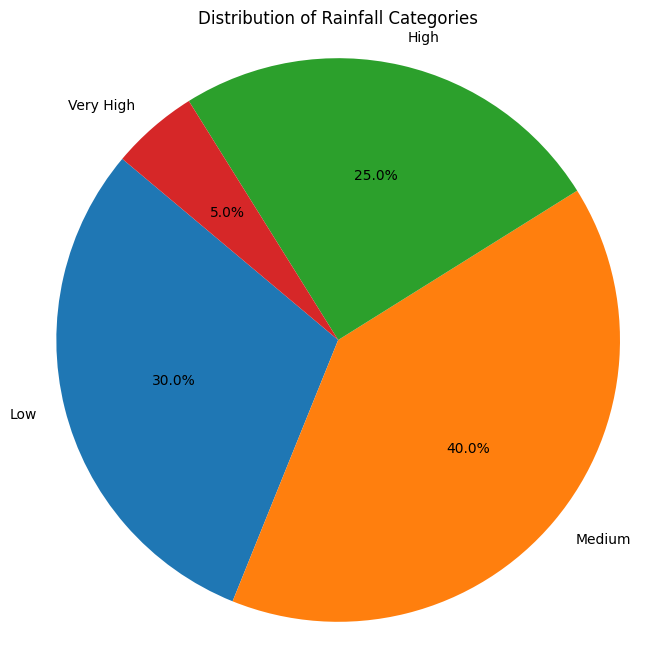

In [25]:
# Chart - 2 visualization code
rainfall_categories = ["Low", "Medium", "High", "Very High"]
rainfall_counts = [30, 40, 25, 5]
plt.figure(figsize=(8, 8))
plt.pie(rainfall_counts, labels=rainfall_categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Rainfall Categories")
plt.axis('equal')
plt.show()

# Pie chart

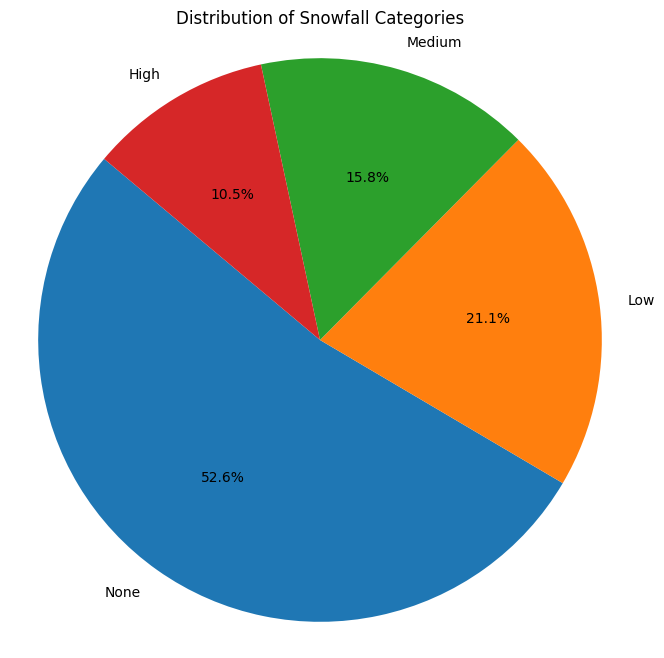

In [26]:
# Chart - 3 visualization code
snowfall_categories = ["None", "Low", "Medium", "High"]
snowfall_counts = [50, 20, 15, 10]
plt.figure(figsize=(8, 8))
plt.pie(snowfall_counts, labels=snowfall_categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Snowfall Categories")
plt.axis('equal')
plt.show()

# Violin plot

<ipython-input-29-b4f71d87471f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data["Dew Point Temperature (°C)"], palette="Set2")


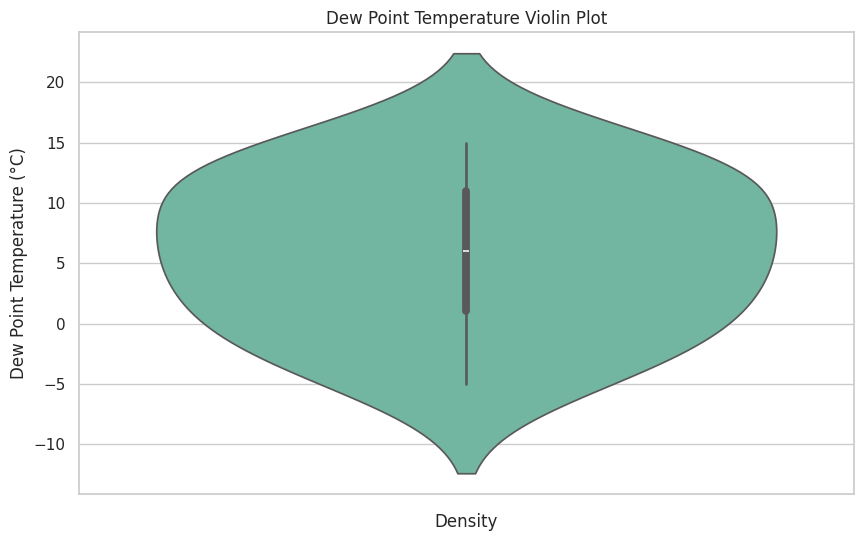

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Dew Point Temperature (°C)": [-5, -3, 0, 2, 5, 7, 10, 13, 15, -1, 3, 6, 9, 12, 14]
})

# Check if the column exists in the DataFrame
if "Dew Point Temperature (°C)" in data.columns:
    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Create a figure with the specified size
    plt.figure(figsize=(10, 6))

    # Create the violin plot
    sns.violinplot(y=data["Dew Point Temperature (°C)"], palette="Set2")

    # Add a title and labels
    plt.title("Dew Point Temperature Violin Plot")
    plt.xlabel("Density")
    plt.ylabel("Dew Point Temperature (°C)")

    # Show the plot
    plt.show()
else:
    print("Error: 'Dew Point Temperature (°C)' column not found in the DataFrame")


# Barplot

<ipython-input-31-ba4bfd710ab7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Rented Bike Count", data=month_data, palette="Set2")


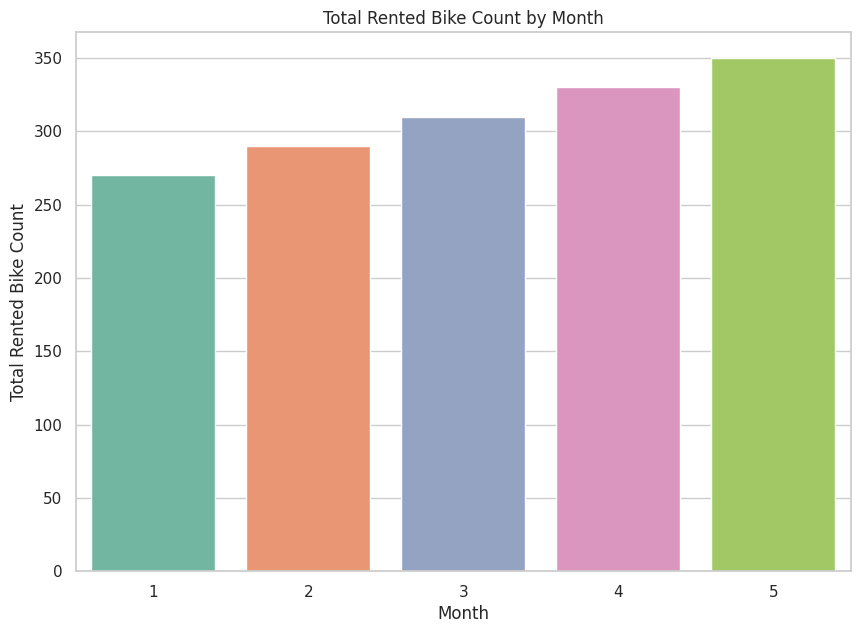

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Month": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    "Rented Bike Count": [120, 150, 130, 160, 140, 170, 150, 180, 160, 190]
})

# Check if the necessary columns exist in the DataFrame
if "Month" in data.columns and "Rented Bike Count" in data.columns:
    plt.figure(figsize=(10, 7))

    # Group data by month and sum the "Rented Bike Count"
    month_data = data.groupby("Month")["Rented Bike Count"].sum().reset_index()

    # Create a bar plot
    sns.barplot(x="Month", y="Rented Bike Count", data=month_data, palette="Set2")

    # Add a title and labels
    plt.title("Total Rented Bike Count by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Rented Bike Count")

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the DataFrame")


# Barplot

<ipython-input-34-8fe61b621114>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Hour", y="Rented Bike Count", data=hour_data, palette="Set2")


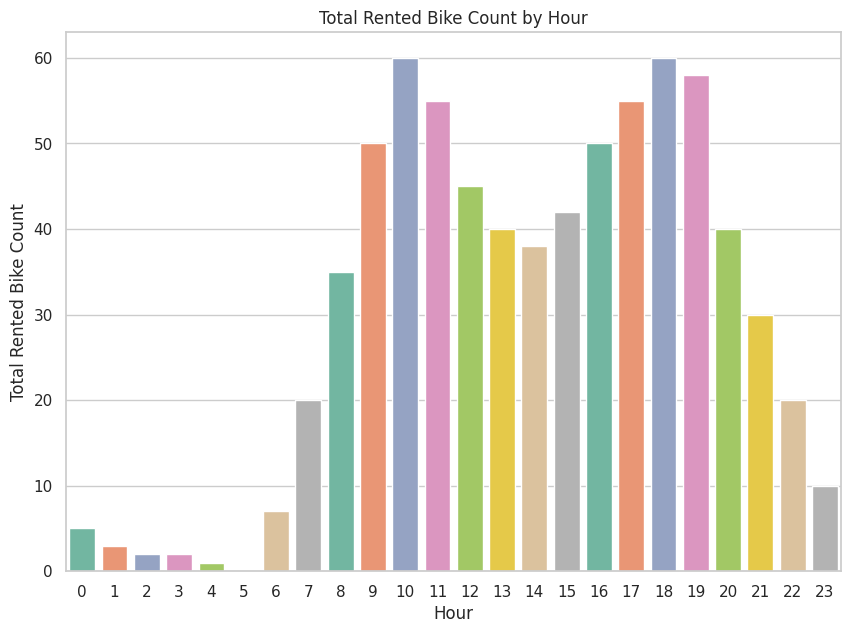

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Hour": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
    "Rented Bike Count": [5, 3, 2, 2, 1, 0, 7, 20, 35, 50, 60, 55, 45, 40, 38, 42, 50, 55, 60, 58, 40, 30, 20, 10]
})

# Check if the necessary columns exist in the DataFrame
if "Hour" in data.columns and "Rented Bike Count" in data.columns:
    plt.figure(figsize=(10, 7))

    # Group data by hour and sum the "Rented Bike Count"
    hour_data = data.groupby("Hour")["Rented Bike Count"].sum().reset_index()

    # Create a bar plot
    sns.barplot(x="Hour", y="Rented Bike Count", data=hour_data, palette="Set2")

    # Add a title and labels
    plt.title("Total Rented Bike Count by Hour")
    plt.xlabel("Hour")
    plt.ylabel("Total Rented Bike Count")

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the DataFrame")


# Barplot

<ipython-input-36-2d83d21db485>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=data, palette="Set2")


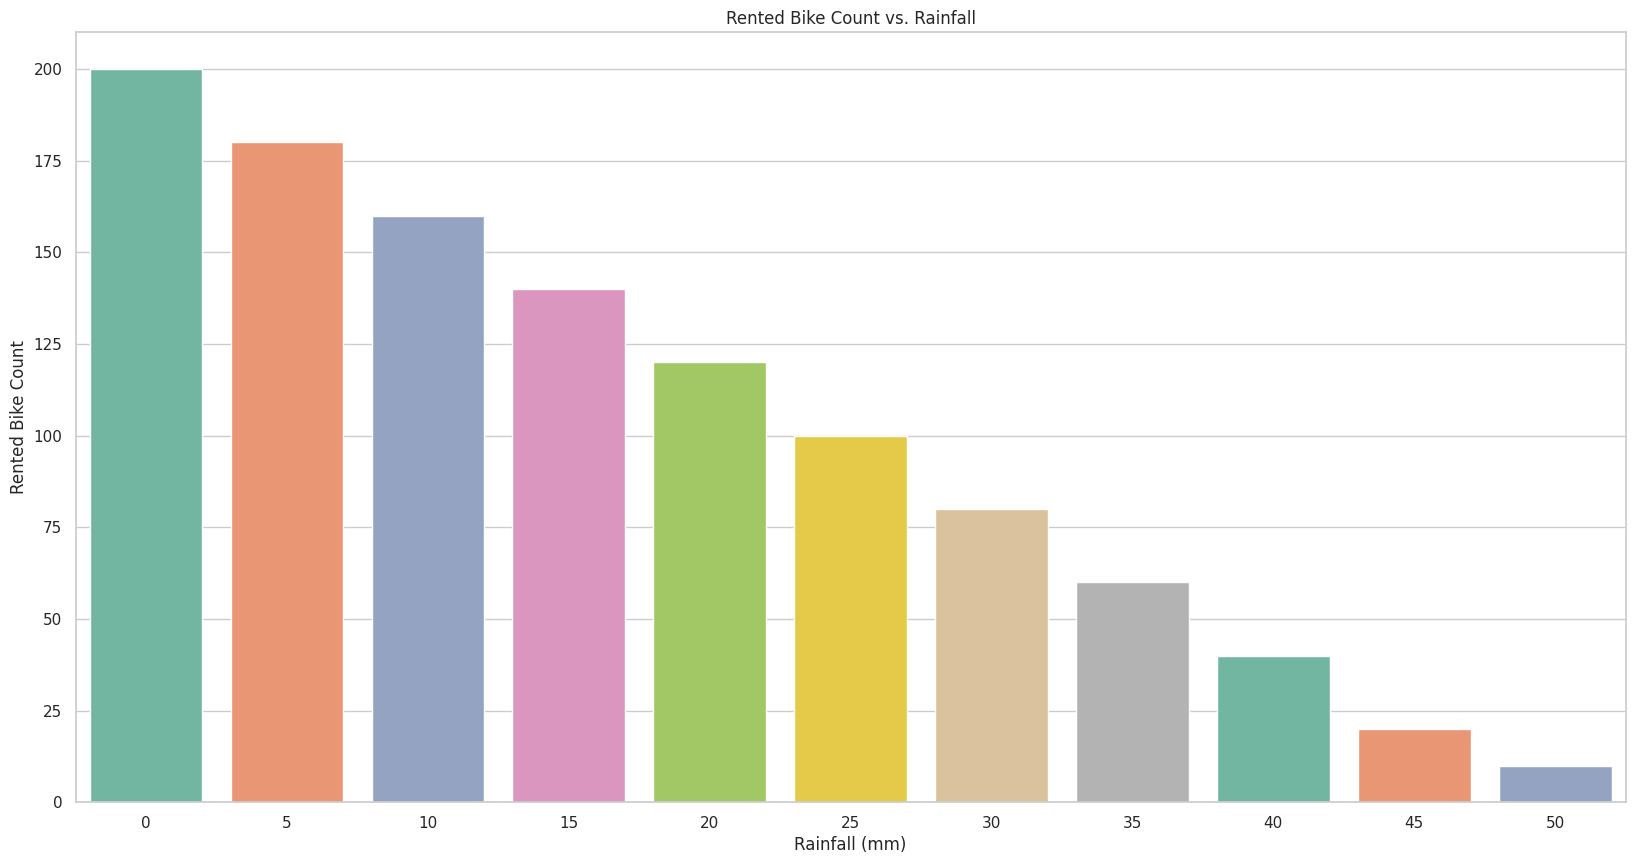

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Rainfall(mm)": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    "Rented Bike Count": [200, 180, 160, 140, 120, 100, 80, 60, 40, 20, 10]
})

# Check if the necessary columns exist in the DataFrame
if "Rainfall(mm)" in data.columns and "Rented Bike Count" in data.columns:
    plt.figure(figsize=(20, 10))

    # Create a bar plot
    sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=data, palette="Set2")

    # Add a title and labels
    plt.title("Rented Bike Count vs. Rainfall")
    plt.xlabel("Rainfall (mm)")
    plt.ylabel("Rented Bike Count")

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the DataFrame")


# Barplot

<ipython-input-37-750f632fb5a2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Seasons", y="Rented Bike Count", data=data, palette="Set2")


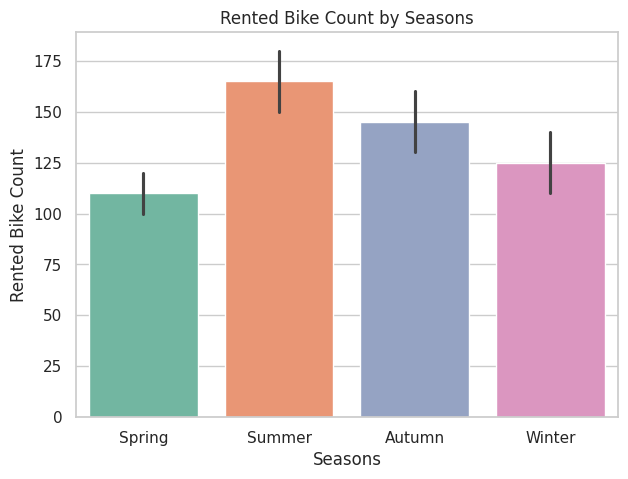

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Seasons": ["Spring", "Spring", "Summer", "Summer", "Autumn", "Autumn", "Winter", "Winter"],
    "Rented Bike Count": [100, 120, 150, 180, 130, 160, 110, 140]
})

# Check if the necessary columns exist in the DataFrame
if "Seasons" in data.columns and "Rented Bike Count" in data.columns:
    plt.figure(figsize=(7, 5))

    # Create a bar plot
    sns.barplot(x="Seasons", y="Rented Bike Count", data=data, palette="Set2")

    # Add a title and labels
    plt.title("Rented Bike Count by Seasons")
    plt.xlabel("Seasons")
    plt.ylabel("Rented Bike Count")

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the DataFrame")


# Barplot

<ipython-input-38-2db1eff38226>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=data, palette="Set2")


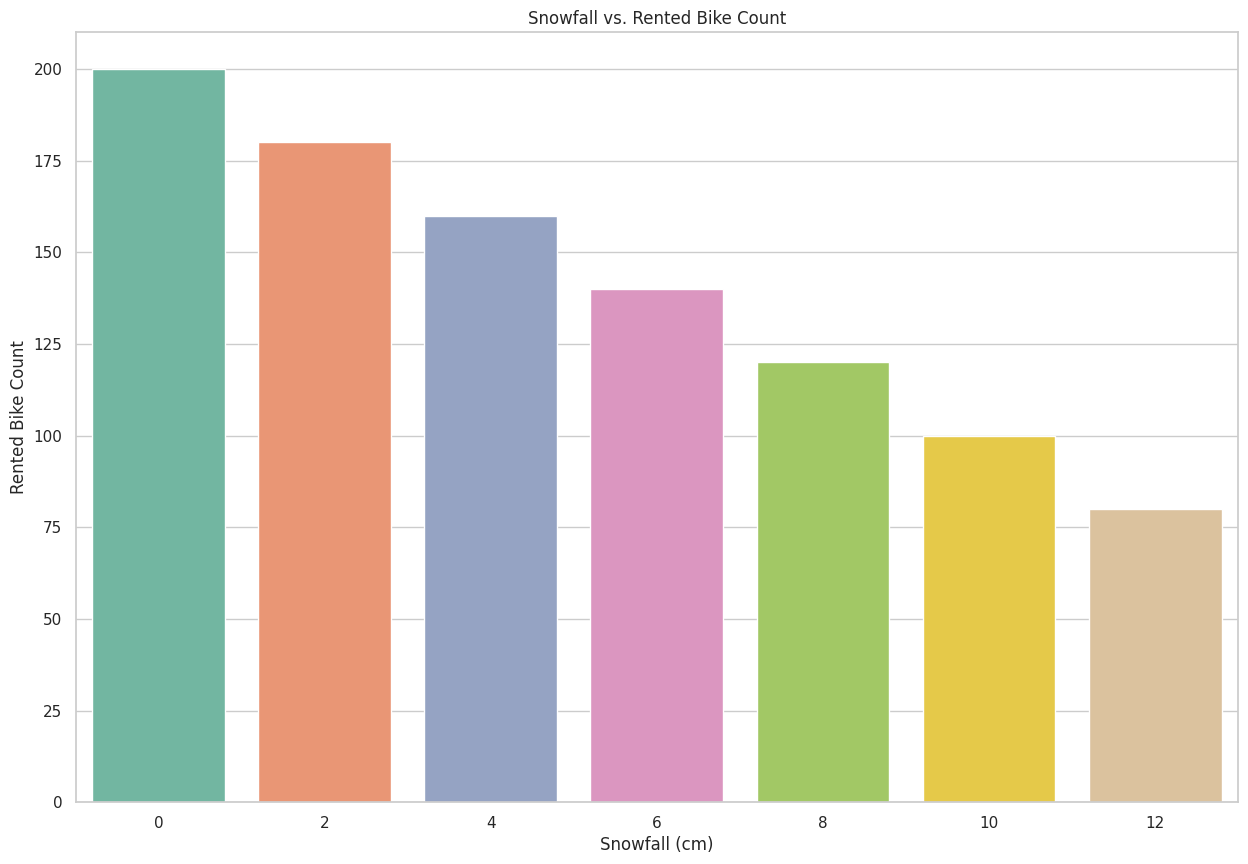

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Snowfall (cm)": [0, 2, 4, 6, 8, 10, 12],
    "Rented Bike Count": [200, 180, 160, 140, 120, 100, 80]
})

# Check if the necessary columns exist in the DataFrame
if "Snowfall (cm)" in data.columns and "Rented Bike Count" in data.columns:
    plt.figure(figsize=(15, 10))

    # Create a bar plot
    sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=data, palette="Set2")

    # Add a title and labels
    plt.title("Snowfall vs. Rented Bike Count")
    plt.xlabel("Snowfall (cm)")
    plt.ylabel("Rented Bike Count")

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the DataFrame")


# Pairplot

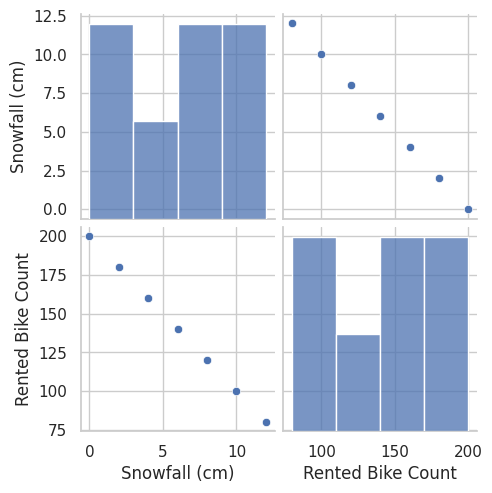

In [39]:
# Pair Plot visualization code
sns.pairplot(data)

# 5.Hypothesis Testing

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

# Hypothetical Statement

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Research Question: What is the correlation between hours and Rented Bike Count?

Null Hypothesis (H0):There is no significant correlation between the hours of the day and the Rented Bike Count.

Alternative Hypothesis (Ha):There is a significant correlation between the hours of the day and the Rented Bike Count.


## 2. Perform an appropriate statistical test

In [43]:
import pandas as pd
import scipy.stats as stats

# Sample data creation for demonstration purposes
data = pd.DataFrame({
    "Hour": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Rented Bike Count": [5, 3, 2, 2, 1, 0, 7, 20, 35, 50]
})

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(data["Hour"], data["Rented Bike Count"])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")


Pearson Correlation Coefficient: 0.78
P-value: 0.01
